<a href="https://colab.research.google.com/github/bilalsarimeseli/HR-Analytics-/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install specific libraries
!pip install pycaret
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached scipy-1.5.4-cp38-cp38-manylinux1_x86_64.whl (25.8 MB)
  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Using cached mlflow-2.1.1-py3-none-any.whl (16.7 MB)
  Using cached pyod-1.0.7.tar.gz (147 kB)
  Preparing metadata (setup.py) ... done
  Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
  

In [5]:
# Make sure pycaret knows we are in colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [8]:
# Load in the data
import pandas as pd
dataset = pd.read_csv('HR-Employee-Attrition.csv')

In [9]:
# spilt into test and train data
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1396, 35)
Unseen Data For Predictions: (74, 35)


In [10]:
data['Attrition'].value_counts() / len(data)

No     0.838109
Yes    0.161891
Name: Attrition, dtype: float64

In [12]:
!pip install numpy==1.20.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.2 which is incompatible.
xarray-einstats 0.5.1 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.9 which is incompatible.
cmdstanpy 1.1.0 requires numpy>=1.21, but you have numpy 1.20.2 which is incompatible.


In [13]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'Attrition', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1396, 35)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Attrition',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [14]:
best_model = compare_models()
#The highest accuracy is in LDA compared to others. 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8710,0.8304,0.5451,0.6699,0.5936,0.5187,0.5269,0.051
ridge,Ridge Classifier,0.8690,0.0000,0.4180,0.7285,0.5234,0.4550,0.4821,0.020
lightgbm,Light Gradient Boosting Machine,0.8649,0.8204,0.3307,0.7883,0.4546,0.3938,0.4468,0.182
lr,Logistic Regression,0.8608,0.8220,0.3935,0.6919,0.4899,0.4183,0.4462,1.091
gbc,Gradient Boosting Classifier,0.8608,0.8367,0.3601,0.7130,0.4650,0.3979,0.4338,0.458
ada,Ada Boost Classifier,0.8536,0.7853,0.4301,0.6345,0.5069,0.4253,0.4392,0.316
et,Extra Trees Classifier,0.8475,0.8230,0.1683,0.8400,0.2751,0.2313,0.3275,0.244
rf,Random Forest Classifier,0.8414,0.8099,0.1219,0.8667,0.2097,0.1744,0.2810,0.483
dummy,Dummy Classifier,0.8240,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.012
knn,K Neighbors Classifier,0.7984,0.5827,0.0935,0.2729,0.1374,0.0565,0.0662,0.041


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


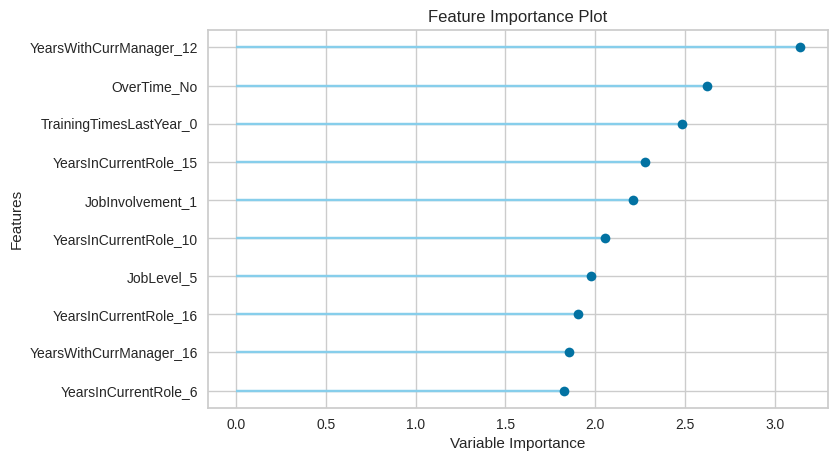

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [15]:
model = create_model('lda') #Since LDA has the highest accuracy, let's set it as our model  and store it in a variable. 
plot_model(model, plot='feature')
#Years with the current manager is the most important feature. 

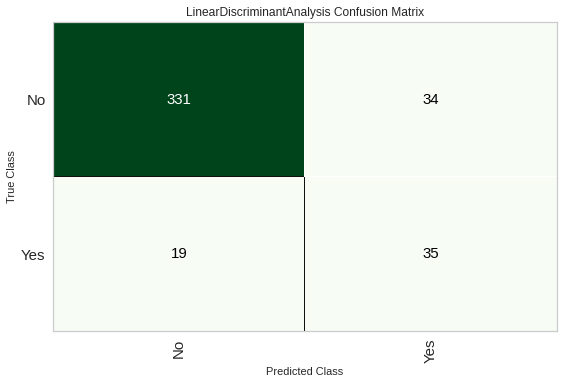

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(model, plot = 'confusion_matrix') #A measure of what we predicted right or wrong
#19 times the model predicted as an employee will remain by a 'yes' but it did not work. 
#35 times, they would leave and they did. 
#34 times, the model predicted 'yes' but they did not leave.

In [17]:
unseen_predictions = predict_model(model, data=data_unseen) #Testing the model against unseen data. 
from pycaret.utils import check_metric
check_metric(unseen_predictions['Attrition'], unseen_predictions['Label'], metric = 'Accuracy')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0,0.6984,0,0,0,0,0


0.8784